# Data Understanding - Initial Analysis

This notebook contains the initial exploratory analyses:\n
- Distribution of publications (year, month) and albums\n
- Distribution of languages\n
- Distribution of bad words (IT / EN)\n
- Distribution of musical features (bpm, loudness, centroid, rolloff, flux, rms, zcr, flatness, spectral_complexity, pitch)\n
- Distribution of lexical density\n
- Comparison of bad words between English and Italian

## Library Imports

In this section we import the necessary libraries for analysis:
- `pandas`: for data manipulation
- `numpy`: for numerical computations
- `matplotlib` and `seaborn`: for data visualization
- `ast`: for safe parsing of string lists
- `pathlib`: for file path management

In [3]:
# Import libraries
import ast
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

## Dataset Loading

In this section we load the two main datasets after the enrichment:
1. `tracks_enriched.csv`: contains information about songs, including musical metadata, lyrics, and statistics
2. `artists.csv`: contains information about artists

Technical notes:
- `tracks_enriched.csv` uses comma as delimiter
- `artists.csv` uses semicolon as delimiter
- We automatically convert numeric columns using `pd.to_numeric()`
- We display the first few rows of both datasets for verification

In [4]:
# Load datasets
DATA_DIR = Path('..').joinpath('datasets') if Path('..').joinpath('datasets').exists() else Path('../datasets')
tracks_path = Path('../enriched_datasets/tracks_enriched.csv')
artists_path = Path('../enriched_datasets/artists.csv')
print('tracks exists:', tracks_path.exists())
print('artists exists:', artists_path.exists())
# read with pandas - tracks.csv appears to use comma delimiter
tracks = pd.read_csv(tracks_path, dtype=str, low_memory=False)
artists = pd.read_csv(artists_path, sep=';', dtype=str, low_memory=False)
# Convert numeric columns where appropriate (a few common ones)
numeric_cols = ['year','month','day','n_sentences','n_tokens','bpm','centroid','rolloff','flux','rms','zcr','flatness','spectral_complexity','pitch','loudness','duration_ms','popularity']
for c in numeric_cols:
    if c in tracks.columns:
        tracks[c] = pd.to_numeric(tracks[c], errors='coerce')

# Quick peek
print('tracks shape:', tracks.shape)
display(tracks.head(3))
print('artists shape:', artists.shape)
display(artists.head(3))

tracks exists: True
artists exists: True
tracks shape: (11166, 45)


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False


artists shape: (104, 1)


,"id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,source"
0,"ART82291002,99 posse,,,Napoli,Italiana,Gruppo ..."
1,"ART18853907,alfa,M,2000-08-19,Genova,Italiana,..."
2,"ART64265460,anna pepe,F,2003-08-15,La Spezia,I..."


## Initial Exploratory Data Analysis

This section contains the exploratory data analysis (EDA) focusing on:
1. **Temporal Distribution**:
   - Release year
   - Release month
2. **Album Types**:
   - Distribution of album types
   - Top 10 albums by number of tracks
3. **Language Distribution**:
   - Visualization of most used languages in songs

The plots are organized in a 2x2 grid for easy comparison.

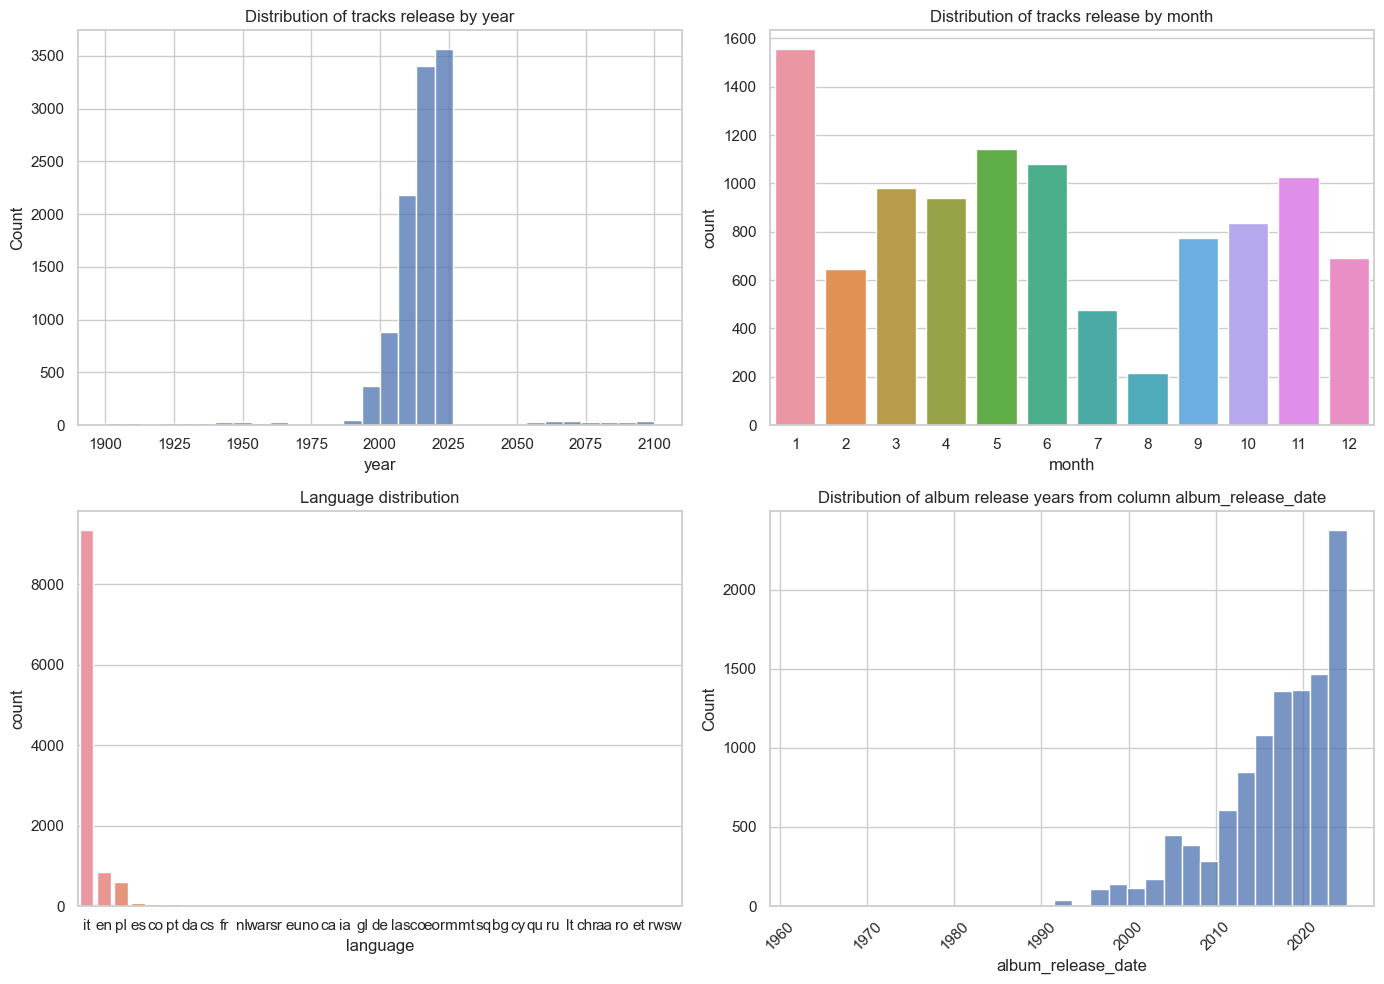

In [3]:
# Initial EDA: distributions for year, month, language and album release dates
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Year tracks distribution
if 'year' in tracks.columns:
    sns.histplot(tracks['year'].dropna().astype(int), bins=30, ax=axes[0,0])
    axes[0,0].set_title('Distribution of tracks release by year')
    
# Month tracks distribution
if 'month' in tracks.columns:
    sns.countplot(x=tracks['month'].dropna().astype(int), ax=axes[0,1], order=sorted(tracks['month'].dropna().astype(int).unique()))
    axes[0,1].set_title('Distribution of tracks release by month')

# Language distribution
if 'language' in tracks.columns:
    sns.countplot(x=tracks['language'].fillna('unknown'), ax=axes[1,0], order=tracks['language'].value_counts().index)
    axes[1,0].set_title('Language distribution')
    plt.xticks(rotation=45)

# Album release date distribution
if 'album_release_date' in tracks.columns:
    # Convert to datetime and extract year
    album_years = pd.to_datetime(tracks['album_release_date'], errors='coerce').dt.year
    sns.histplot(album_years.dropna(), bins=30, ax=axes[1,1])
    axes[1,1].set_title('Distribution of album release years from column album_release_date')

plt.tight_layout()
plt.show()

## Musical Features Analysis

This section analyzes the musical characteristics of the tracks:
1. **Acoustic Features**:
   - Duration
   - Loudness
   - Tempo
   - Time signature
2. **Audio Properties**:
   - Acousticness
   - Danceability
   - Energy
   - Instrumentalness
3. **Musical Elements**:
   - Key distribution
   - Mode (major/minor)
   - Time signature patterns

The visualizations help understand:
- The distribution of each feature
- Relationships between different musical aspects
- Common patterns in contemporary music production
- Technical characteristics of popular tracks

Found musical columns: ['bpm', 'loudness', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch']


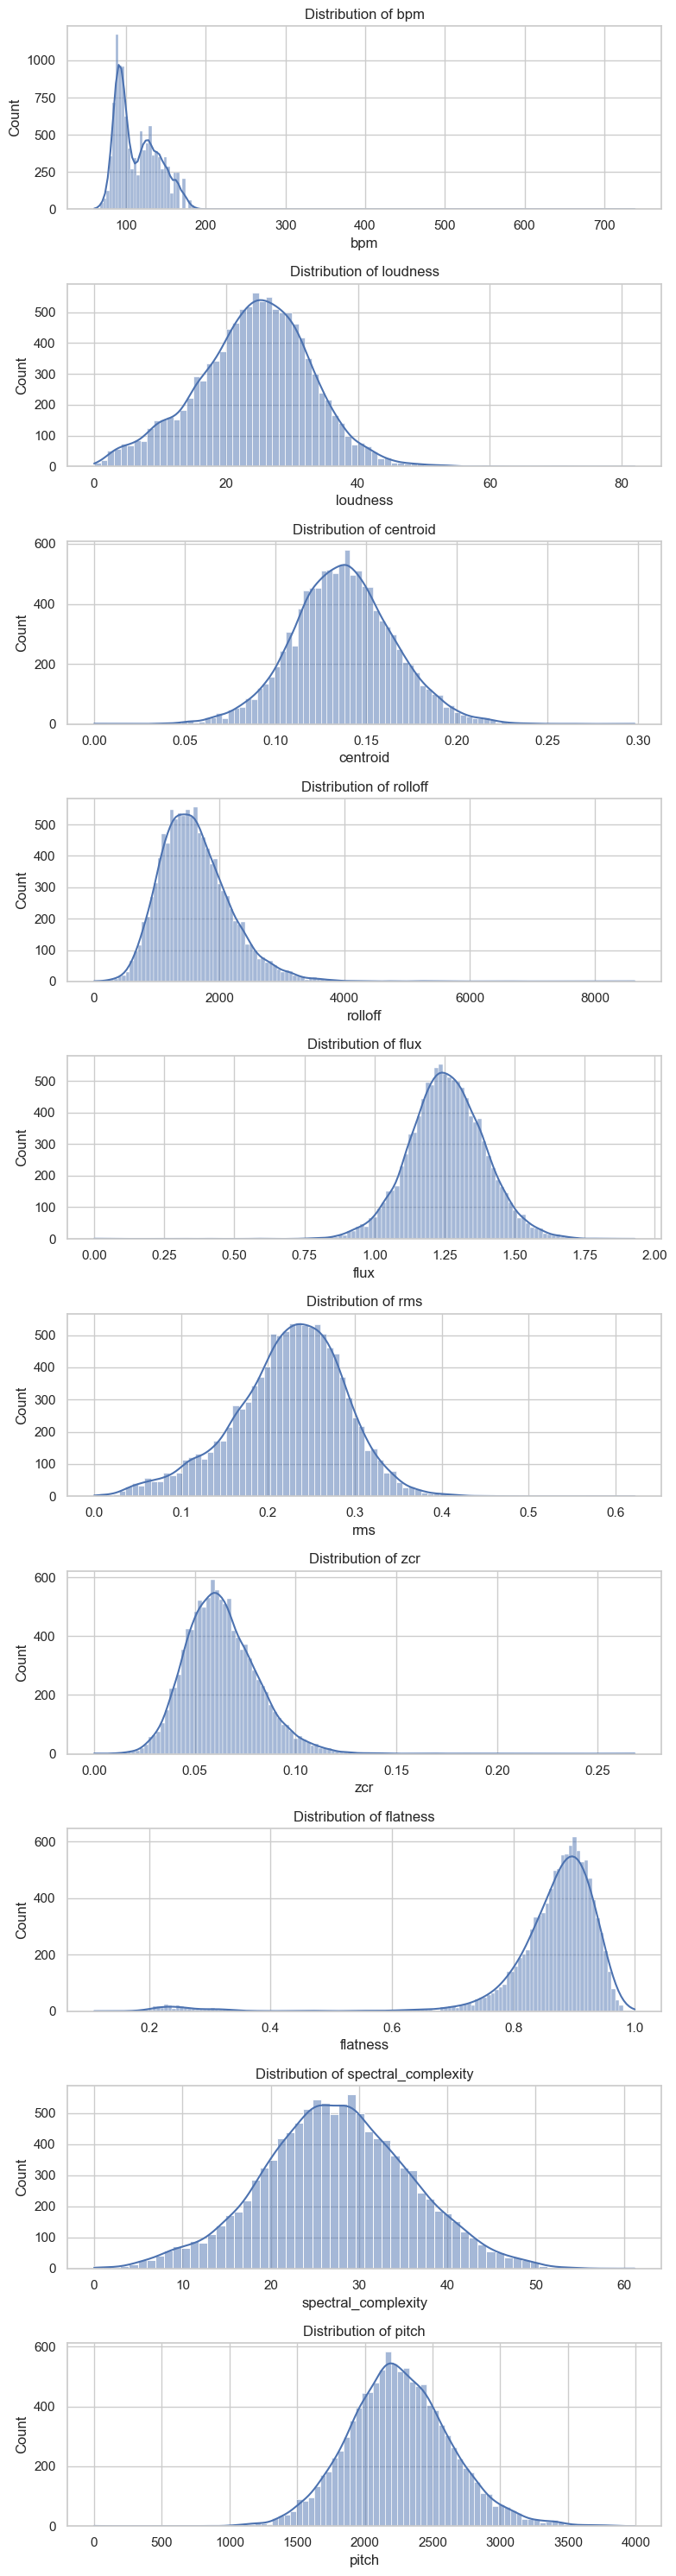

In [4]:
# Quick overview of musical features distributions
musical_cols = [c for c in ['bpm','loudness','centroid','rolloff','flux','rms','zcr','flatness','spectral_complexity','pitch'] if c in tracks.columns]
print('Found musical columns:', musical_cols)
if musical_cols:
    fig, axs = plt.subplots(len(musical_cols), 1, figsize=(8, 3*len(musical_cols)))
    for i,c in enumerate(musical_cols):
        ax = axs[i] if len(musical_cols)>1 else axs
        sns.histplot(tracks[c].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {c}')
    plt.tight_layout()

    plt.show()

## Bad Words Analysis

This section analyzes the distribution of bad words in both Italian and English:
1. **Overall Distribution**:
   - Count of bad words per language
   - Most common bad words
2. **Comparative Analysis**:
   - Distribution between Italian and English bad words
   - Tracks with most bad words

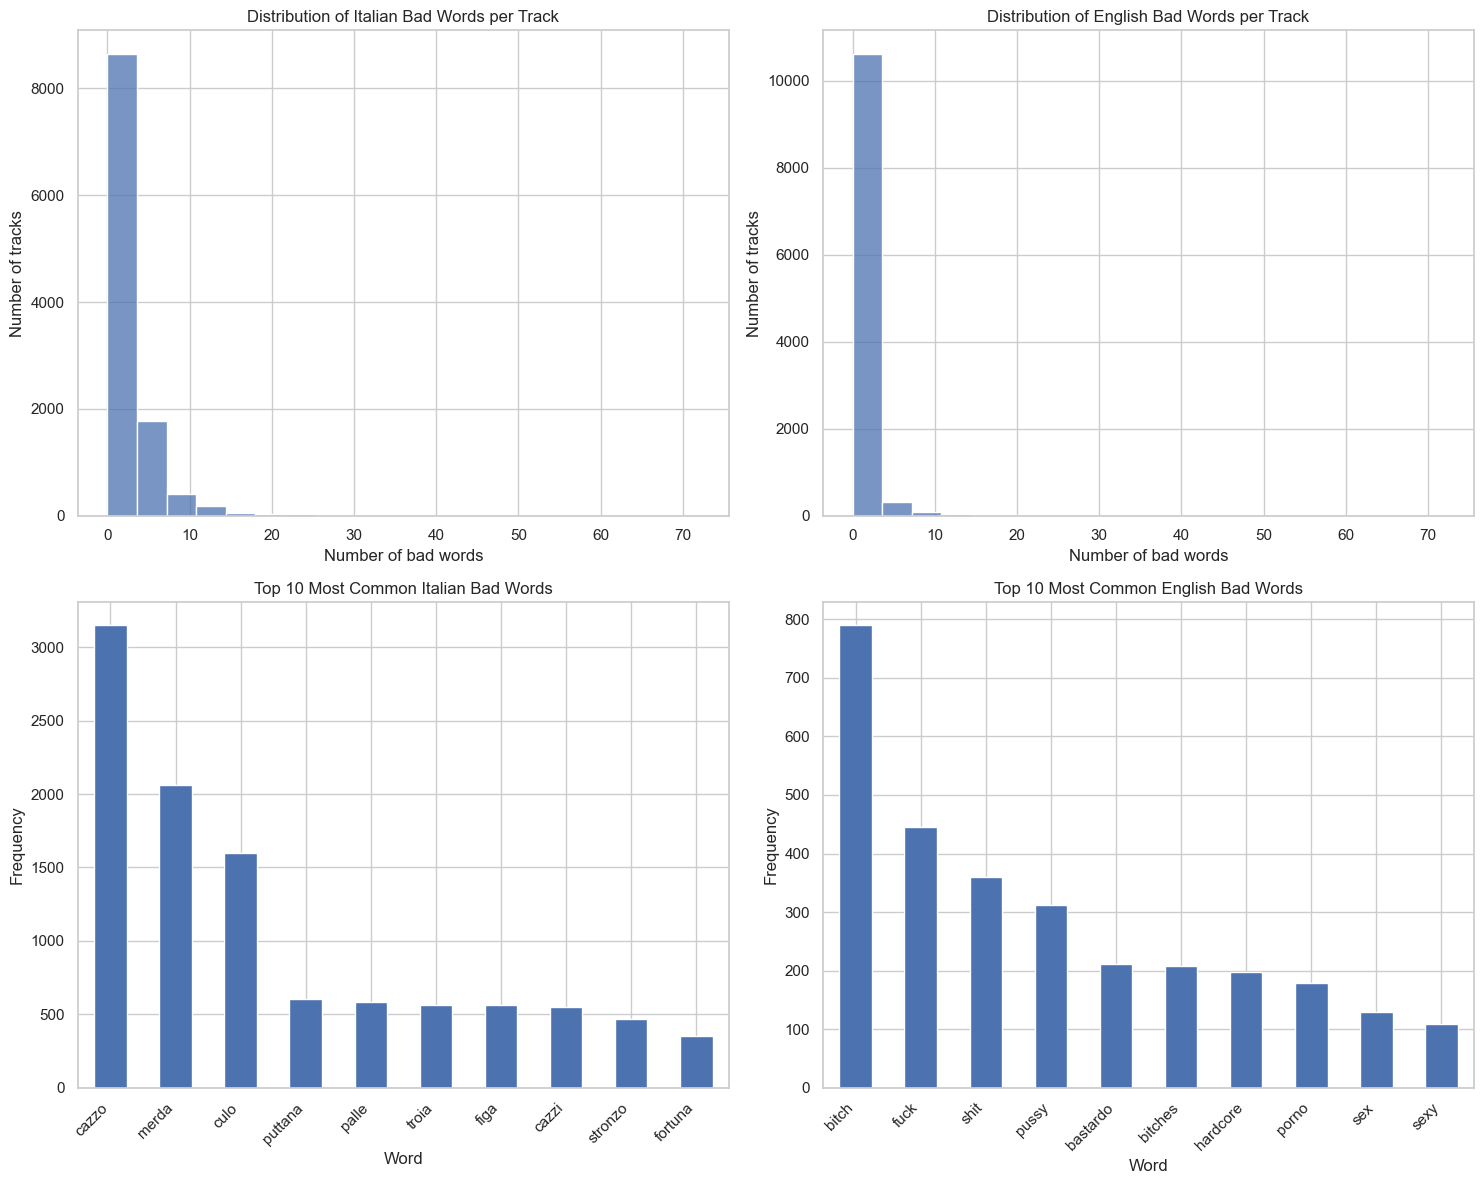


Summary Statistics:
Total number of tracks with Italian bad words: 6990
Total number of tracks with English bad words: 2740
Total unique Italian bad words: 173
Total unique English bad words: 96

Most common Italian bad words:
cazzo      3150
merda      2062
culo       1596
puttana     606
palle       582

Most common English bad words:
bitch       790
fuck        445
shit        360
pussy       312
bastardo    212


In [5]:
# Function to extract words from string representation of list
def extract_words(word_list_str):
    if pd.isna(word_list_str):
        return []
    try:
        return ast.literal_eval(word_list_str)
    except:
        return []

# Convert swear counts to numeric
tracks['swear_IT'] = pd.to_numeric(tracks['swear_IT'], errors='coerce').fillna(0)
tracks['swear_EN'] = pd.to_numeric(tracks['swear_EN'], errors='coerce').fillna(0)

# Extract Italian and English bad words
tracks['swear_IT_list'] = tracks['swear_IT_words'].apply(extract_words)
tracks['swear_EN_list'] = tracks['swear_EN_words'].apply(extract_words)

# Count occurrences of each bad word
it_words = [word for words in tracks['swear_IT_list'] for word in words]
en_words = [word for words in tracks['swear_EN_list'] for word in words]

it_word_counts = pd.Series(it_words).value_counts()
en_word_counts = pd.Series(en_words).value_counts()

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of number of bad words per track (Italian)
sns.histplot(tracks['swear_IT'], ax=ax1, bins=20)
ax1.set_title('Distribution of Italian Bad Words per Track')
ax1.set_xlabel('Number of bad words')
ax1.set_ylabel('Number of tracks')

# Plot 2: Distribution of number of bad words per track (English)
sns.histplot(tracks['swear_EN'], ax=ax2, bins=20)
ax2.set_title('Distribution of English Bad Words per Track')
ax2.set_xlabel('Number of bad words')
ax2.set_ylabel('Number of tracks')

# Plot 3: Top 10 most common Italian bad words
if len(it_word_counts) > 0:
    it_word_counts.head(10).plot(kind='bar', ax=ax3)
    ax3.set_title('Top 10 Most Common Italian Bad Words')
    ax3.set_xlabel('Word')
    ax3.set_ylabel('Frequency')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: Top 10 most common English bad words
if len(en_word_counts) > 0:
    en_word_counts.head(10).plot(kind='bar', ax=ax4)
    ax4.set_title('Top 10 Most Common English Bad Words')
    ax4.set_xlabel('Word')
    ax4.set_ylabel('Frequency')
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of tracks with Italian bad words: {(tracks['swear_IT'] > 0).sum()}")
print(f"Total number of tracks with English bad words: {(tracks['swear_EN'] > 0).sum()}")
print(f"Total unique Italian bad words: {len(it_word_counts)}")
print(f"Total unique English bad words: {len(en_word_counts)}")
print("\nMost common Italian bad words:")
print(it_word_counts.head().to_string())
print("\nMost common English bad words:")
print(en_word_counts.head().to_string())

In [6]:
# Create detailed analysis of bad words occurrences
def print_word_statistics(word_counts, total_tracks, language):
    print(f"\n{'-'*50}")
    print(f"Complete list of {language} bad words:")
    print(f"{'-'*50}")
    print(f"{'Word':<20} {'Occurrences':<15} {'% of Tracks':<15}")
    print(f"{'-'*50}")
    
    for word, count in word_counts.items():
        percentage = (count / total_tracks) * 100
        print(f"{word:<20} {count:<15} {percentage:.2f}%")

# Calculate total number of tracks
total_tracks = len(tracks)

# Print statistics for Italian bad words
print_word_statistics(it_word_counts, total_tracks, "Italian")

# Print statistics for English bad words
print_word_statistics(en_word_counts, total_tracks, "English")

# Additional summary statistics
print(f"\n{'-'*50}")
print("Summary:")
print(f"{'-'*50}")
print(f"Total tracks analyzed: {total_tracks}")
print(f"Total unique Italian bad words: {len(it_word_counts)}")
print(f"Total unique English bad words: {len(en_word_counts)}")
print(f"Total Italian bad word occurrences: {sum(it_word_counts)}")
print(f"Total English bad word occurrences: {sum(en_word_counts)}")
print(f"Average Italian bad words per track: {sum(it_word_counts)/total_tracks:.2f}")
print(f"Average English bad words per track: {sum(en_word_counts)/total_tracks:.2f}")


--------------------------------------------------
Complete list of Italian bad words:
--------------------------------------------------
Word                 Occurrences     % of Tracks    
--------------------------------------------------
cazzo                3150            28.21%
merda                2062            18.47%
culo                 1596            14.29%
puttana              606             5.43%
palle                582             5.21%
troia                564             5.05%
figa                 562             5.03%
cazzi                551             4.93%
stronzo              469             4.20%
fortuna              354             3.17%
fottuto              347             3.11%
cesso                298             2.67%
coglioni             272             2.44%
stupido              251             2.25%
fottere              248             2.22%
coglione             234             2.10%
bastardo             212             1.90%
bastardi             20